# Data analysis over subset of features from github API

In [1]:
import glob
import numpy as np
import json
from pprint import pprint

packages = glob.iglob('/Users/samuelsusla/Downloads/repos/**/*.json', recursive=True)

tmp = []
for filepath in packages:
    with open(filepath) as file:
        data = json.load(file)
    tmp.append([
            data.get('stargazers_count'),
            data.get('forks_count'),
            data.get('open_issues_count'),
            data.get('size'),
            data.get('subscribers_count'),
        ])    

repos = np.array(tmp)
print(repos.shape)

(162874, 5)


# Plot distribution of number of stars

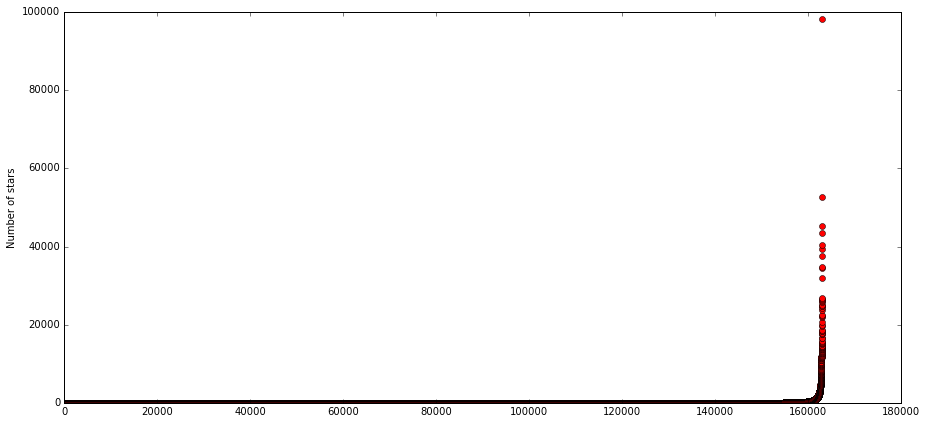

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

sorted_by_stars = np.sort(repos[:, 0], axis=0)

plt.figure(figsize=(15, 7), dpi=80)
plt.plot(sorted_by_stars, 'ro')
plt.ylabel('Number of stars')
plt.show()


# Plot distribution of number of forks

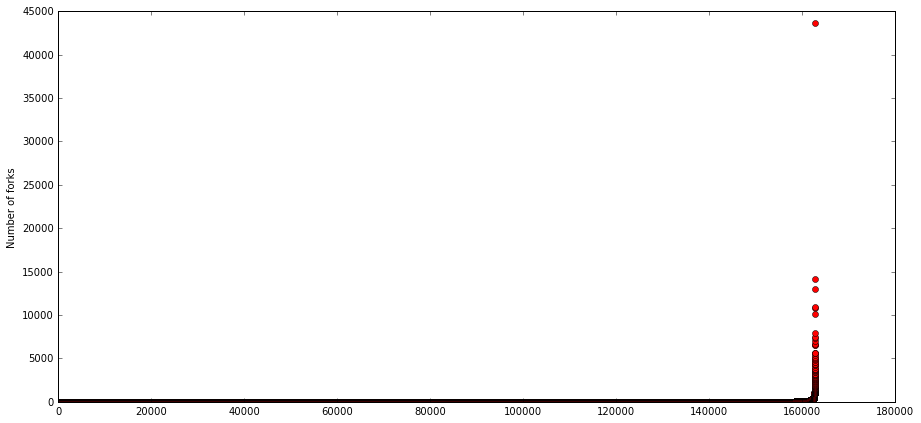

In [3]:
sorted_by_forks = np.sort(repos[:, 1], axis=0)

plt.figure(figsize=(15, 7), dpi=80)
plt.plot(sorted_by_forks, 'ro')
plt.ylabel('Number of forks')
plt.show()



# Plot distribution of number of opened issues

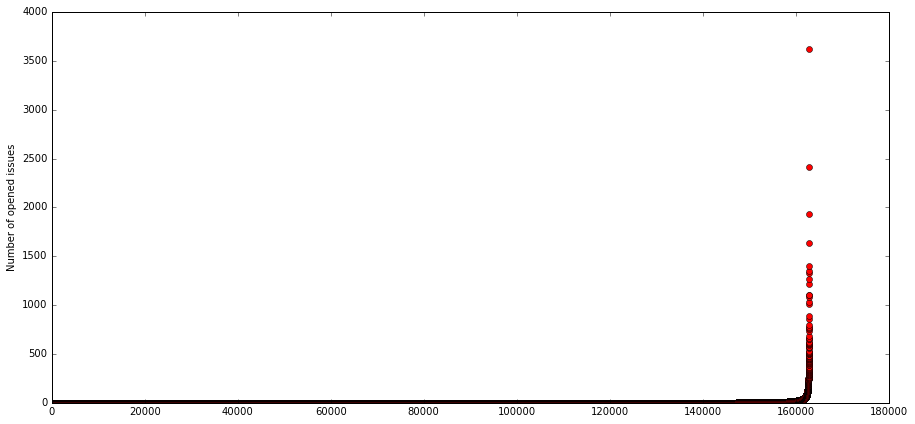

In [4]:
sorted_by_issues = np.sort(repos[:, 2], axis=0)

plt.figure(figsize=(15, 7), dpi=80)
plt.plot(sorted_by_issues, 'ro')
plt.ylabel('Number of opened issues')
plt.show()

# Plot distribution of size of repository

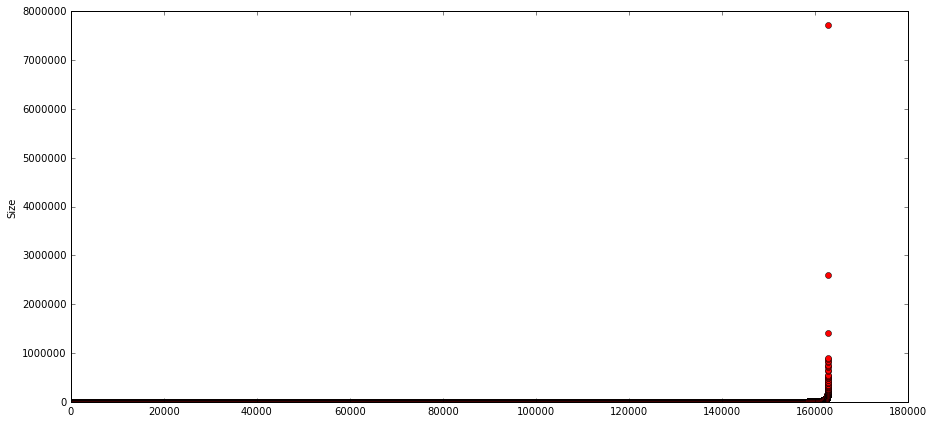

In [5]:
sorted_by_size = np.sort(repos[:, 3], axis=0)

plt.figure(figsize=(15, 7), dpi=80)
plt.plot(sorted_by_size, 'ro')
plt.ylabel('Size')
plt.show()

# Plot distribution of number of subsribers

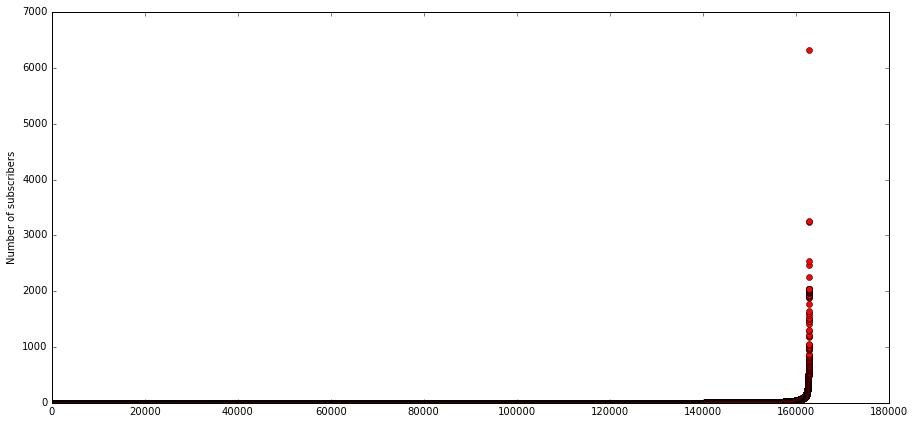

In [6]:
sorted_by_subscribers = np.sort(repos[:, 4], axis=0)

plt.figure(figsize=(15, 7), dpi=80)
plt.plot(sorted_by_subscribers, 'ro')
plt.ylabel('Number of subscribers')
plt.show()

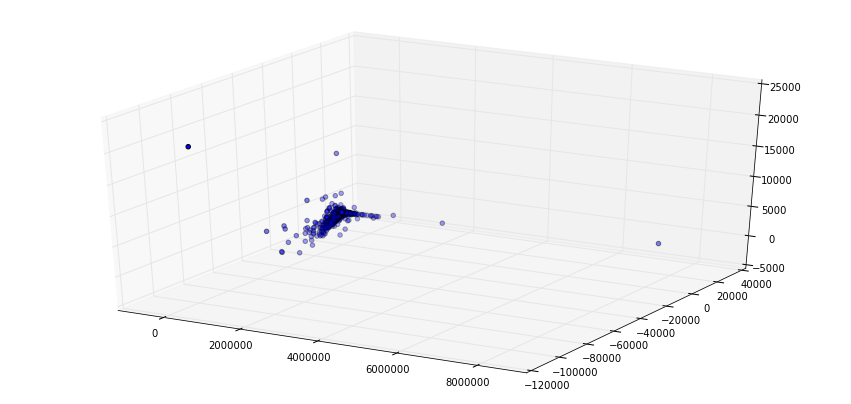

In [7]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca.fit(repos)

transformed = pca.transform(repos)

fig = plt.figure(figsize=(15, 7), dpi=80)

ax = fig.add_subplot(111, projection='3d')
n = 100

    
ax.scatter(transformed[:,0], transformed[:,1], transformed[:,2])

plt.show()

## Mean values for features

In [8]:
print("Mean stars: {}".format(np.mean(repos[:,0])))
print("Mean forks: {}".format(np.mean(repos[:,1])))
print("Mean issues: {}".format(np.mean(repos[:,2])))
print("Mean size: {}".format(np.mean(repos[:,3])))
print("Mean subsribers: {}".format(np.mean(repos[:,4])))

Mean stars: 45.47515257192676
Mean forks: 8.17276545059371
Mean issues: 2.1650601078134017
Mean size: 1140.0874295467663
Mean subsribers: 5.534179795424684


In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(repos[:, 1:])
y = repos[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y)

randomForestRegressor = RandomForestRegressor(100)
randomForestRegressor.fit(X_train, y_train)
y_pred = randomForestRegressor.predict(X_test)

from sklearn.metrics import mean_squared_error, explained_variance_score, median_absolute_error

print("Mean: ", mean_squared_error(y_test, y_pred))
print("Variance", explained_variance_score(y_test, y_pred))
print("Median", median_absolute_error(y_test, y_pred))

/Users/samuelsusla/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Mean:  112416.87369
Variance 0.821419603695
Median 1.272
